In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
!unzip -q "/content/drive/MyDrive/DLproject/dataset.zip" -d "/content/dataset"


In [4]:
!ls /content/dataset/dataset/


test  train


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [6]:
train_dir = '/content/dataset/dataset/train'
test_dir = '/content/dataset/dataset/test'


In [7]:
image_size = (150, 150)  # You can change this based on model size
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 9955 images belonging to 4 classes.
Found 2491 images belonging to 4 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: Normal, Cyst, Tumor, Stone
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10  # You can increase later
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 60s 174ms/step - accuracy: 0.7419 - loss: 0.6578 - val_accuracy: 0.9968 - val_loss: 0.0128
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 48s 153ms/step - accuracy: 0.9834 - loss: 0.0521 - val_accuracy: 0.9988 - val_loss: 0.0061
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 48s 153ms/step - accuracy: 0.9944 - loss: 0.0203 - val_accuracy: 0.9996 - val_loss: 0.0017
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 48s 153ms/step - accuracy: 0.9928 - loss: 0.0210 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step - accuracy: 0.9966 - loss: 0.0095 - val_accuracy: 0.9996 - val_loss: 5.2427e-04
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.9960 - loss: 0.0160 - val_accuracy: 0.9996 - val_loss: 9.2434e-04
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.9962 - loss: 0.0103 - val_accuracy: 0.9984 - val_loss: 0.0028
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.9937 -

In [10]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])


Final Training Accuracy: 0.9971873164176941
Final Validation Accuracy: 1.0


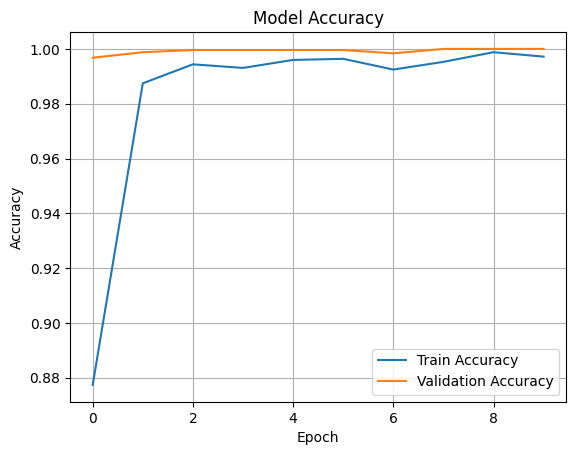

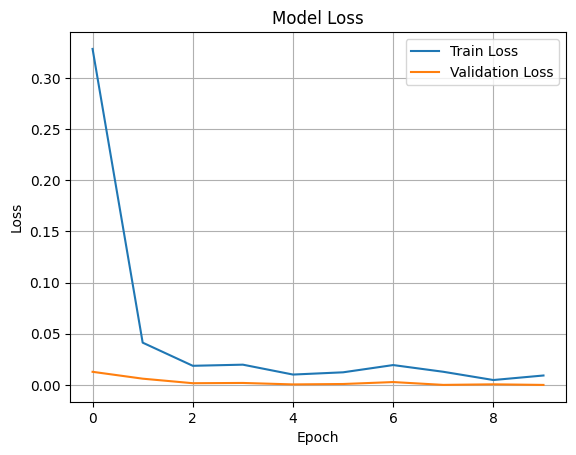

In [11]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)


78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 1.0000 - loss: 2.0029e-05
Test Accuracy: 1.0


In [13]:
model.save("kidney_classifier_model.h5")


In [15]:
from google.colab import files
files.download("kidney_classifier_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>